In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split

In [9]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)
warnings.filterwarnings(action = 'ignore', category=UserWarning)

In [10]:
## 读取数据
path1 = "datas/winequality-red.csv"
df1 = pd.read_csv(path1, sep=";")
df1['type'] = 1 # 设置数据类型为红葡萄酒

path2 = "datas/winequality-white.csv"
df2 = pd.read_csv(path2, sep=";")
df2['type'] = 2 # 设置数据类型为白葡萄酒

# 合并两个df
df = pd.concat([df1,df2], axis=0)

## 自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]

## 因变量名称
quality = "quality"

In [11]:
names1=[]
for i in list(df):
    names1.append(i)


In [12]:
## 异常数据处理
new_df = df.replace('?', np.nan)
datas = new_df.dropna(how = 'any') # 只要有列为空，就进行删除操作

X = datas[names]
Y = datas[quality]
Y.ravel()

array([5, 5, 5, ..., 6, 7, 6], dtype=int64)

In [13]:
## 创建模型列表
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression())
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', RidgeCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LassoCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', ElasticNetCV(alphas=np.logspace(-4,2, 20), l1_ratio=np.linspace(0, 1, 5)))
        ])
]

线性回归预测:1阶, 截距:104, 系数: [ 0.00000000e+00  8.50118207e-02 -1.48620723e+00 -6.90416760e-02
  6.23516751e-02 -7.18643184e-01  4.99059722e-03 -1.45047299e-03
 -1.03460590e+02  4.97432666e-01  7.21153860e-01  2.23033948e-01
 -3.51639435e-01]
线性回归预测:2阶, 截距:-926, 系数: [-1.53328635e-05 -2.75607378e+01  1.01172114e+02  2.48363269e+02
 -1.75937002e+01 -1.15256738e+03 -2.47657151e+00  9.08814008e-01
  1.51673142e+03  1.22648432e+02  5.79953109e+01  2.03593913e+01
  1.55553549e+01 -4.34318334e-02  3.31320953e-02  4.24739823e-01
 -2.31878257e-02 -2.40247894e+00 -7.35719408e-05  3.64009509e-04
  2.78865438e+01  9.27783427e-02  2.07233707e-01  1.34480742e-02
  5.45491074e-02  4.37670832e-01  8.75879632e-01 -3.84236403e-02
  1.10461091e+00  5.84956244e-03  7.21047495e-03 -1.09383486e+02
  9.44208780e-01  3.90477722e-01  3.15802919e-01 -1.20298473e+00
 -1.04158882e+00  6.70367331e-02  6.55542659e+00  8.39269382e-03
 -5.18668367e-04 -2.58961482e+02  1.54314156e+00 -5.12297705e-01
 -1.24440986e-02  6.56758

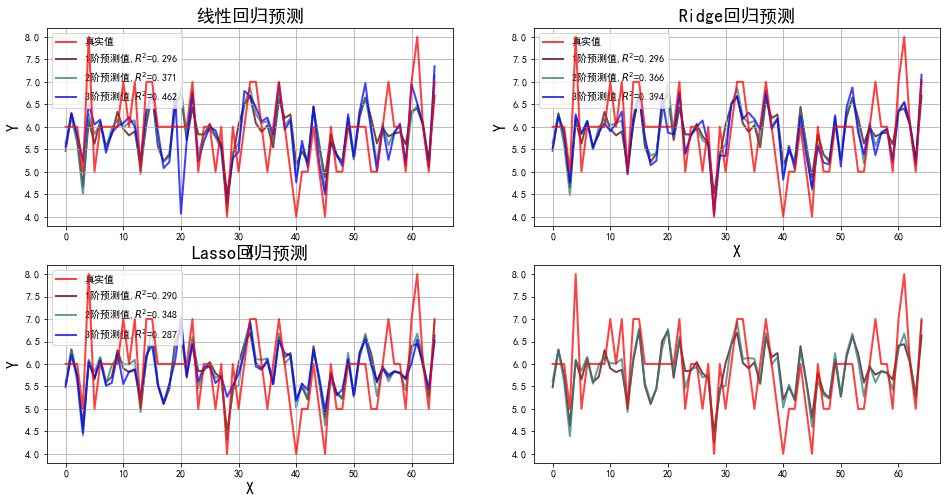

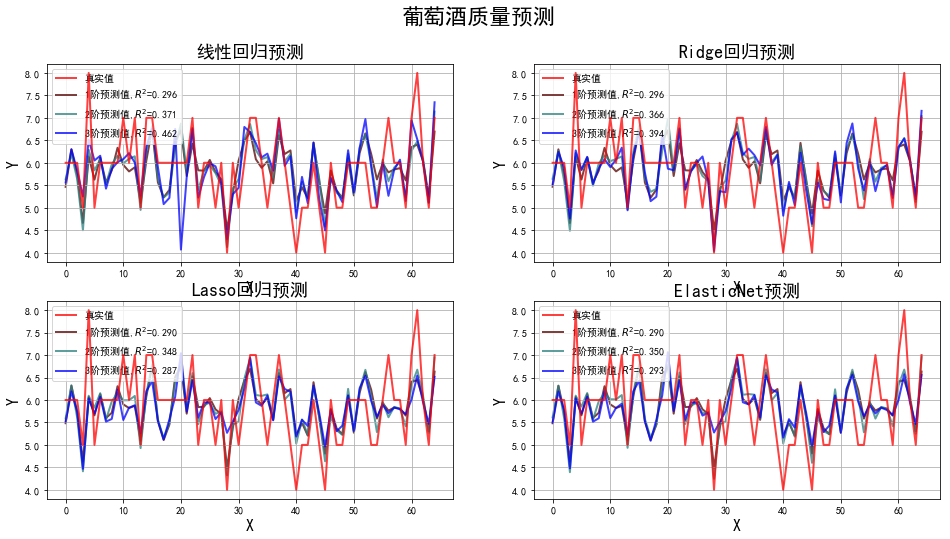

In [14]:
plt.figure(figsize=(16,8), facecolor='w')
titles = u'线性回归预测', u'Ridge回归预测', u'Lasso回归预测', u'ElasticNet预测'

## 将数据分为训练数据和测试数据
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
ln_x_test = range(len(X_test))

## 给定阶以及颜色
d_pool = np.arange(1,4,1) # 1 2 3 阶
m = len(d_pool)
clrs = [] # 颜色
for c in np.linspace(5570560, 255, m):
    clrs.append('#%06x' % int(c))


for t in range(4):
    plt.subplot(2, 2, t + 1)
    model = models[t]
    plt.plot(ln_x_test, Y_test, c='r', lw=2, alpha=0.75, zorder=10, label=u'真实值')
    for i,d in enumerate(d_pool):
        # 设置参数
        model.set_params(Poly__degree=d)
        # 模型训练
        model.fit(X_train, Y_train)
        # 模型预测及计算R^2
        Y_pre = model.predict(X_test)
        R = model.score(X_train, Y_train)
        # 输出信息
        lin = model.get_params('Linear')['Linear']
        output = u"%s:%d阶, 截距:%d, 系数:" % (titles[t], d, lin.intercept_)
        print(output, lin.coef_)
        ## 图形展示
        plt.plot(ln_x_test, Y_pre, c=clrs[i], lw=2,alpha=0.75, zorder=i, label=u'%d阶预测值,$R^2$=%.3f' % (d,R))
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.title(titles[t], fontsize=18)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.suptitle(u'葡萄酒质量预测', fontsize=22)
plt.show()